# GX 6004-001:  Applied Data Science (Session 5)

### A Brief Digression on PCA

* Up to PCA, we examined the most common supervised learning method: regression.
* PCA is a an unsupervised learning technique that examines commonalities (or clustering) in the feature set.
* What is clustering?

### Clustering 

* Clustering is (merely) organizing the world into objects with similar features and applying labels to them.  
* An object with four legs that is brown may be labelled a horse.  
* A small object with four legs that is brown may be labelled a dog.  
* In other words, clustering objects according to their features is second nature to humans.
* PCA is simply one of many clustering algorithms.

### Clustering has proven to be an extraordinarily valuable tool

* Two **overwhelmingly successful** examples:

    1. The periodic table of elements in chemistry: clustered on __?
    2. The standard model of particle physics: clustered on __?

* Clustering based on observed characteristics can, however, also be extraordinarily misleading.  
    * Genetically a cow is more silimar to a whale than it is to a horse.  
* In a dataframe, a cluster is a set of labels that are more similar to each other (with respect to their features) than to members of other clusters.  

### In Other Words

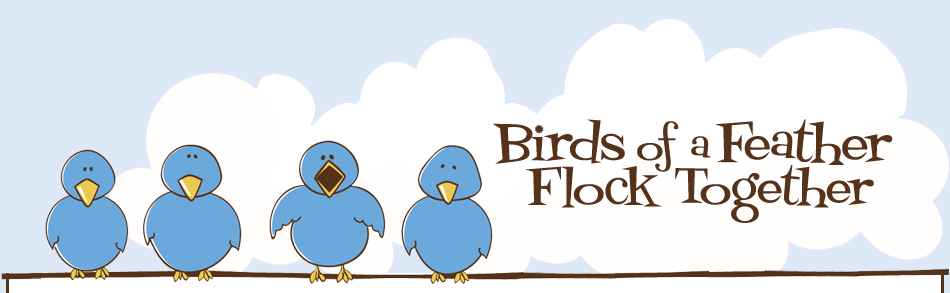

In [1]:
from PIL import Image
import urllib.request as url
import io

fd = url.urlopen("http://www.undergroundwineletter.com/wp-content/uploads/2012/01/birds-of-a-feather-cartoon.png")
image_file = io.BytesIO(fd.read())
Image.open(image_file)

In [1]:
# Load the libraries.  Everyone should pip install tabulate.  
# Anaconda automatically installs sklearn.

%matplotlib inline
import warnings
import numpy as np
import pandas as pd
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#import Quandl
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
warnings.simplefilter('ignore')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from pylab import get_cmap

In [2]:
# Generate some data for scatterplots.

random.seed(12345)
red = np.random.multivariate_normal([-1, 1], [[1,0],[0,1]], 1000)
blue = np.random.multivariate_normal([1, -1], [[1,0],[0,1]], 1000)

Text(0.5, 1.0, 'A Scatterplot')

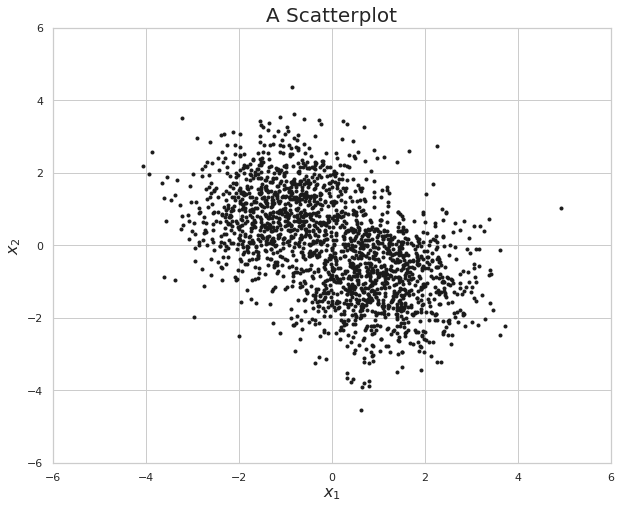

In [3]:
plt.figure(figsize=(10,8))
plt.plot(red, blue, 'k.')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'A Scatterplot', fontsize = 20)

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 2000, 'y' with size 2000.

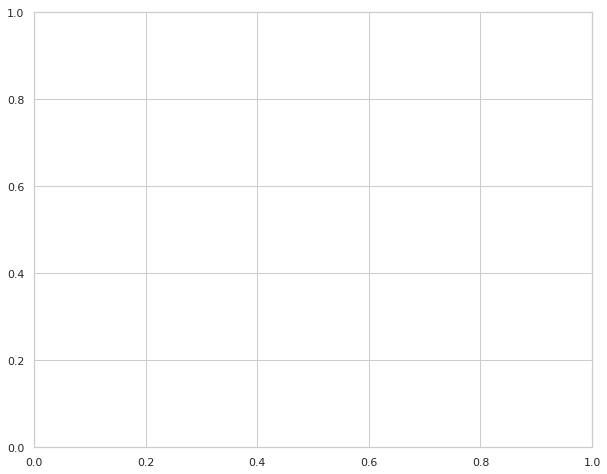

In [4]:
plt.figure(figsize=(10,8))
colors = ['red', 'blue']
plt.scatter(red, blue, c=colors)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'A Scatterplot with Red-Blue Labels', fontsize = 20)

### Consider the LeCun MNIST data (and PCA)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

ModuleNotFoundError: No module named 'keras'

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_digits = 1
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
#    plt.axis('off')
plt.show()
print('Training label(s): %s' % (y_train[0:num_digits],))

NameError: name 'mnist' is not defined

### These are grey scale images that can be converted to dataframes
* Consider the idea of placing small squares on these images.  Call them **'pixels'**.  
* Or call them a column in an Excel spreadsheet.  **It is the same thing.**
* The darker the pixel, the larger the value in the Excel cell.  
* In a spreadsheet, the first column would be the number 5.  
* Given these data are 25 X 25 pixels of grey scale: there are $25^2 + 1$ columns.

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_pp = (X_train.reshape(X_train.shape[0], num_pixels).astype('float32'))

NameError: name 'X_train' is not defined

### As a Spreadsheet
* If it can be digitized, it can be analyzed.
* And everything can be digitized.

In [8]:
print(y_train[0])
print(X_train_pp[0])

NameError: name 'y_train' is not defined

NameError: name 'X_train' is not defined

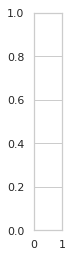

In [9]:
num_digits = 10
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
    plt.axis('off')
plt.show()
print('Training labels: %s' % (y_train[0:num_digits],))

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [3]:
X = load_digits().data 
y = load_digits().target 

data=pd.DataFrame(np.concatenate((y.reshape(len(y), 1), X), axis=1))

X.shape

(1797, 64)

In [4]:
# Predetermine the number of eigenvalues to explain variance. 

eigen = 10
pca = PCA(eigen)
p = pca.fit_transform(X) 
p


array([[ -1.25949897,  21.27489337,  -9.46311913, ...,   2.5643326 ,
         -0.56107264,   3.61536601],
       [  7.95755879, -20.76871767,   4.4396258 , ...,  -4.60803007,
          3.58168259,  -1.11487204],
       [  6.99192304,  -9.95597837,   2.95841922, ..., -16.40181561,
          0.73768863,   4.2419423 ],
       ...,
       [ 10.80130092,  -6.96020856,   5.59932496, ...,  -7.40832824,
         -3.93295371, -13.02991615],
       [ -4.87214527,  12.42398176, -10.17101426, ...,  -4.34476204,
          3.95716991, -13.1662032 ],
       [ -0.34437684,   6.36558119,  10.77352876, ...,   0.67348369,
         -4.09851543, -12.54361884]])

[179.0069301  163.71774688 141.78843907 101.10037509  69.51316431
  59.108492    51.8845259   44.01498241  40.3107122   37.01145361]


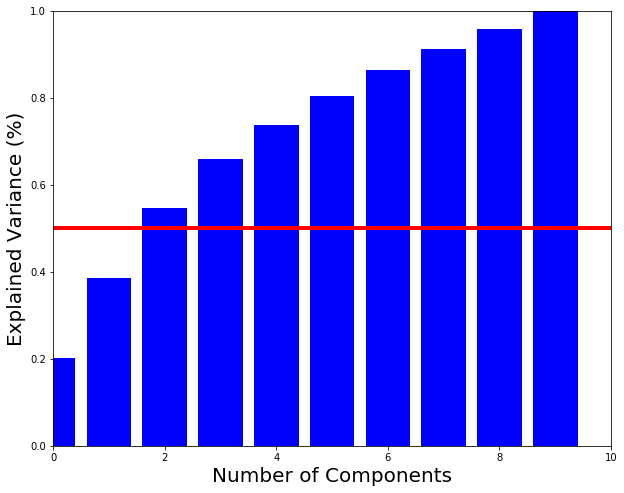

In [7]:
# Plot explained variance.
import matplotlib.pyplot as plt
eigenvalues = pca.explained_variance_
print(eigenvalues)
plt.figure(figsize = (10, 8))
plt.bar(np.arange(eigen), eigenvalues.cumsum()/eigenvalues.sum(), align='center', color='b')
plt.xlim(0, eigen)
plt.ylim(0, 1)
plt.axhline(y=0.5, linewidth=4, color='r')
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Explained Variance (%)', fontsize=20)
plt.show()


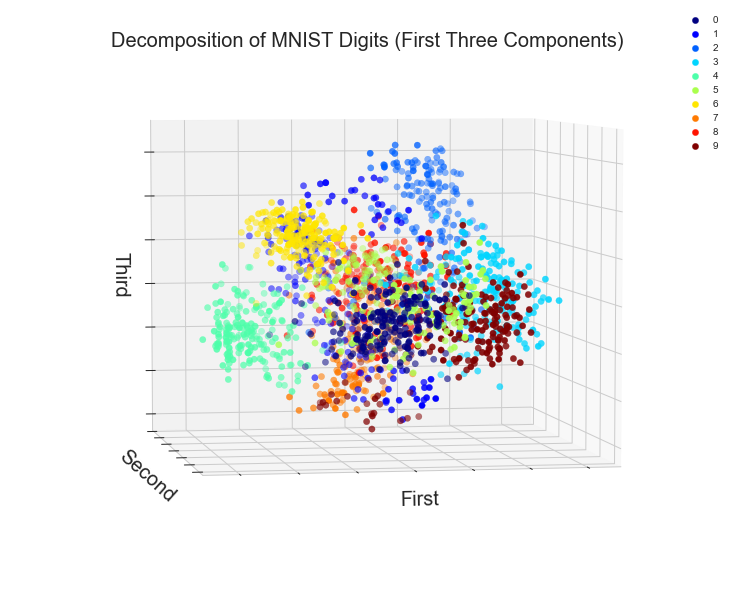

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig)
ax.view_init(5, 80) # Rotate through 20, 40, 60, 80
cmap=cm.jet(np.linspace(0, 1, 10))

for d in range(0, 10):
    ind = y == d 
    ax.scatter(p[ind, 0], p[ind, 1], p[ind, 2], color=cmap[d, :], label=d, s=40)

ax.set_title("Decomposition of MNIST Digits (First Three Components)", size=20)
ax.set_xlabel("First", size=20)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Second", size=20)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Third", size=20)
ax.w_zaxis.set_ticklabels([])
ax.legend()

# Now It's Your Turn: Proposals for ADS Projects